# IMPORT LIBRARY

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer,  MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
df = pd.read_csv('diabetes_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EXPLORATORY DATA ANALYSIS

Mengecek apakah ada data yang duplikat

In [ ]:
duplicate = df.duplicated().sum()
duplicate

3854

Membuang data yang duplikat

In [ ]:
df = df.drop_duplicates()
jumlah_data = len(df)
jumlah_data

96146

Mengecek apakah ada missing value di dalam data tersebut

<Axes: >

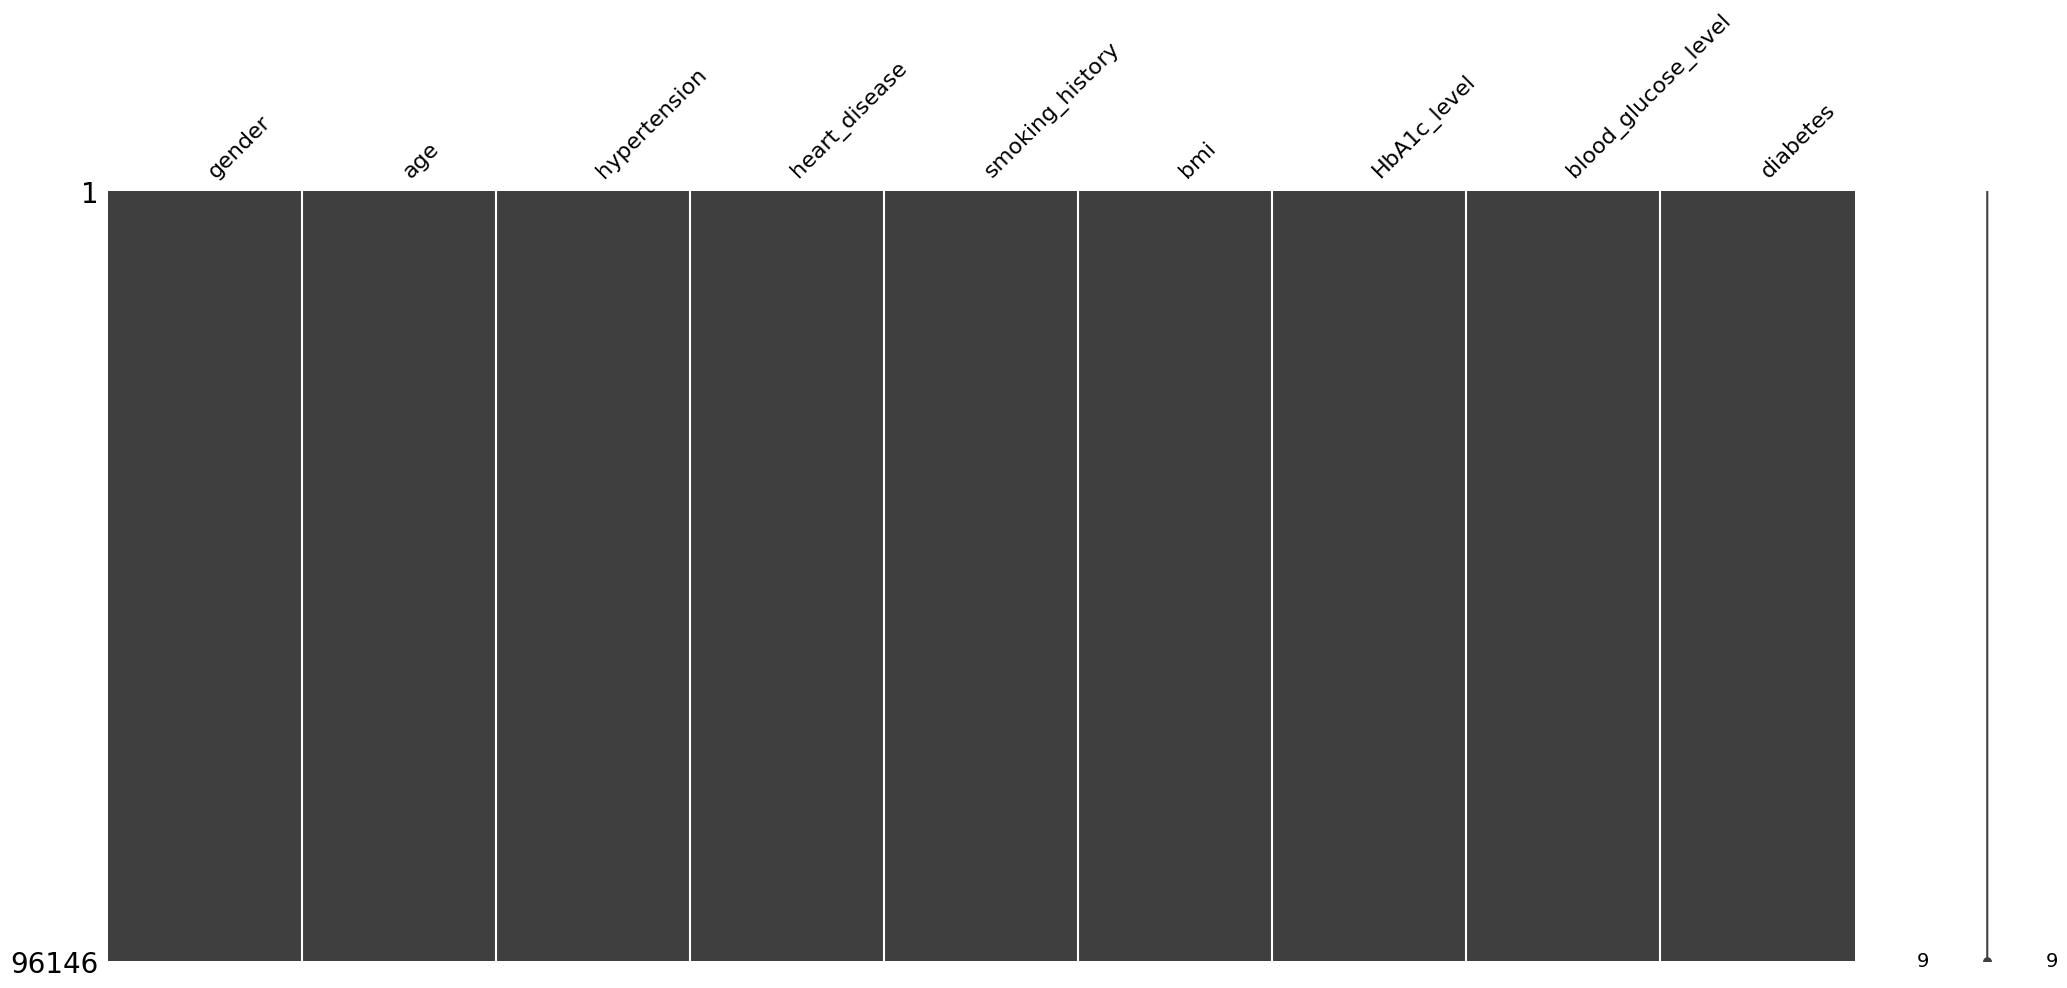

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


Mengecek nilai uniq setiap data

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

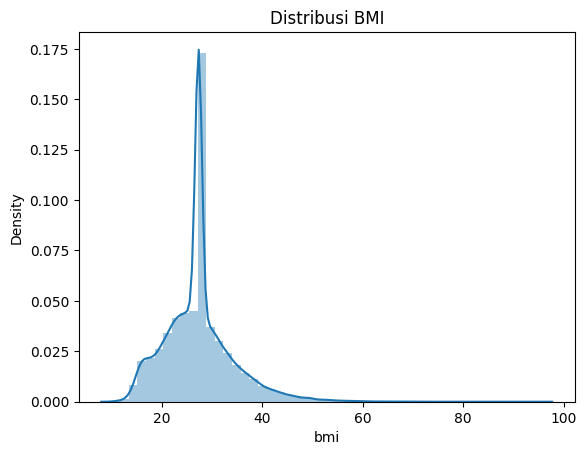

In [ ]:
sns.distplot(df['bmi'])
plt.title('Distribusi BMI')
plt.show()

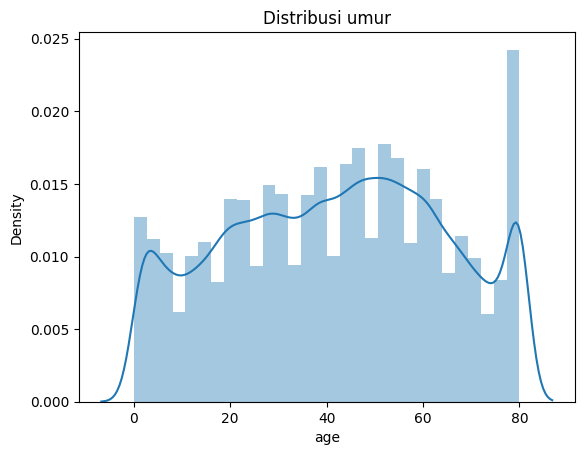

In [ ]:
sns.distplot(df['age'], bins=30)
plt.title('Distribusi umur')
plt.show()

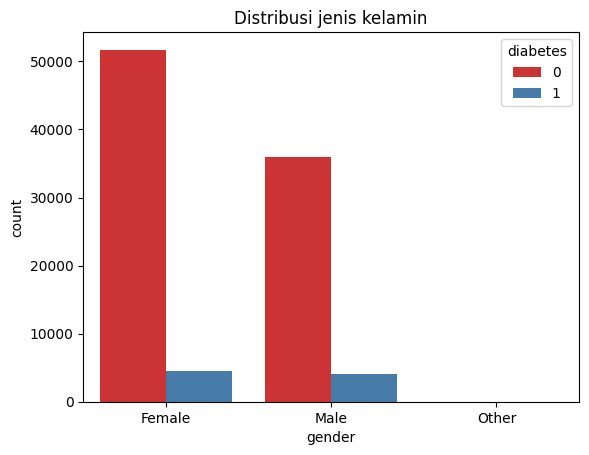

In [ ]:
sns.countplot(x='gender', data=df, palette='Set1',hue='diabetes')
plt.title('Distribusi jenis kelamin')
plt.show()

In [ ]:
df['gender'] = df['gender'].replace('Other', np.nan)
df = df.dropna()
len(df)

96128

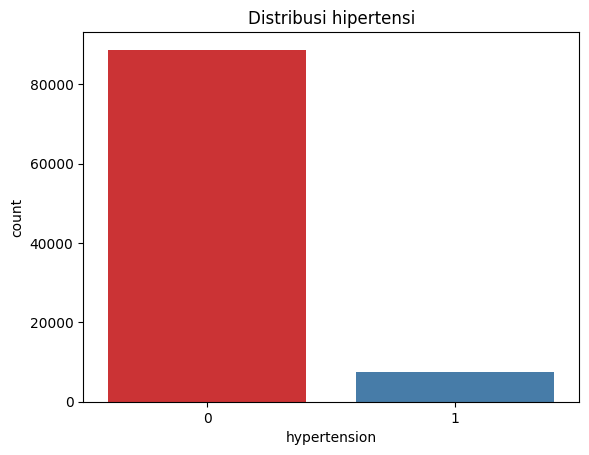

In [ ]:
sns.countplot(x='hypertension', data=df,palette='Set1')
plt.title('Distribusi hipertensi')
plt.show()

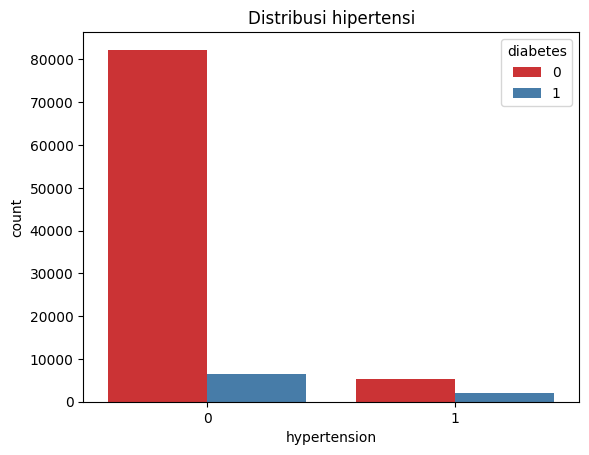

In [ ]:
sns.countplot(x='hypertension', data=df,palette='Set1',hue='diabetes')
plt.title('Distribusi hipertensi')
plt.show()

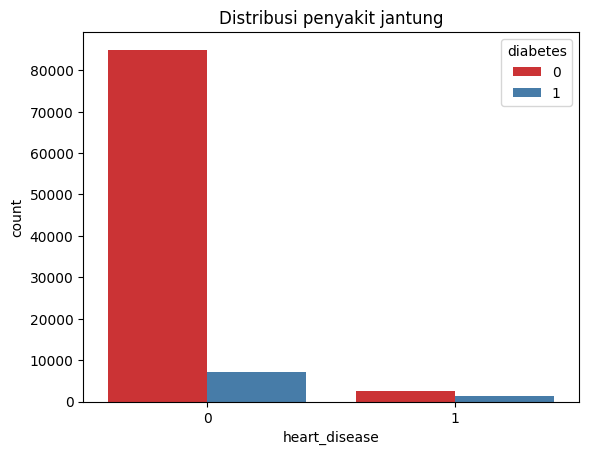

In [ ]:
sns.countplot(x='heart_disease', data=df, palette='Set1',hue='diabetes')
plt.title('Distribusi penyakit jantung')
plt.show()

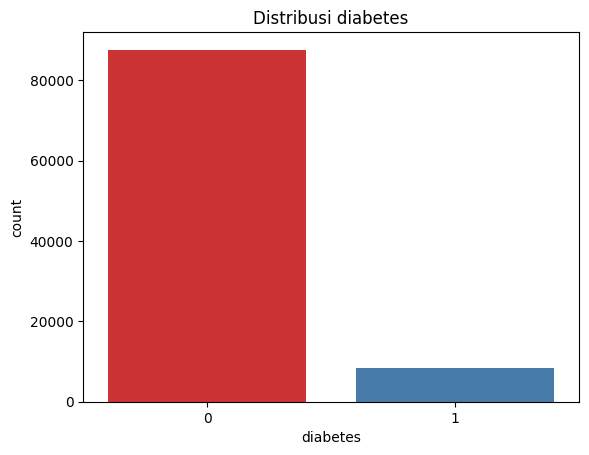

In [ ]:
sns.countplot(x='diabetes', data=df, palette='Set1')
plt.title('Distribusi diabetes')
plt.show()

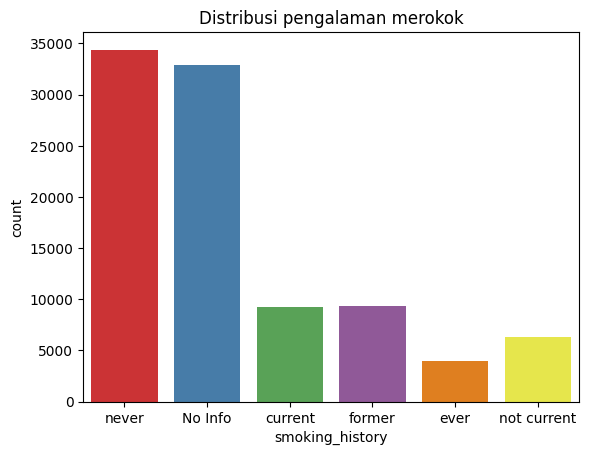

In [ ]:
sns.countplot(x='smoking_history', data=df, palette='Set1')
plt.title('Distribusi pengalaman merokok')
plt.show()

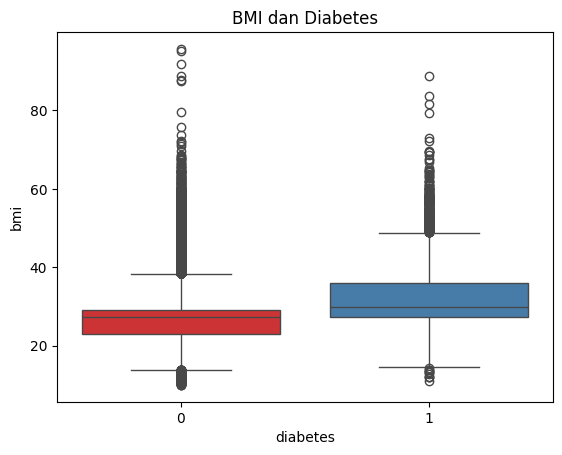

In [ ]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette='Set1')
plt.title('BMI dan Diabetes')
plt.show()

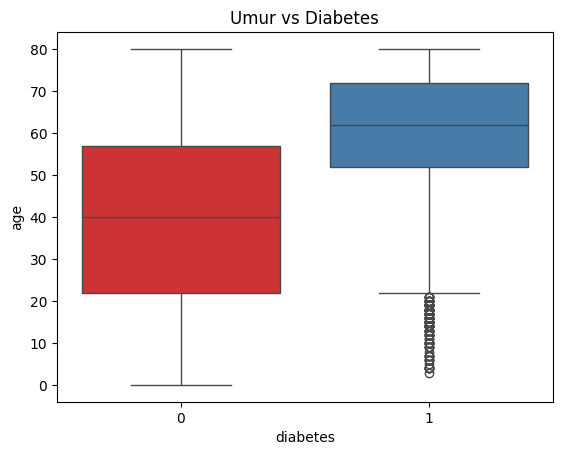

In [ ]:
sns.boxplot(x='diabetes', y='age', data=df, palette='Set1')
plt.title('Umur vs Diabetes')
plt.show()

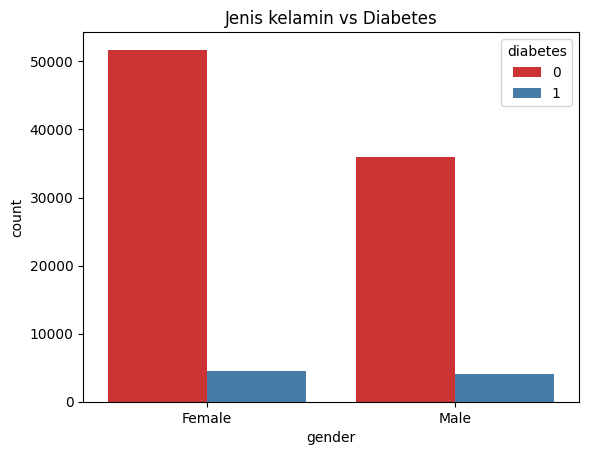

In [ ]:
sns.countplot(x='gender', hue='diabetes', data=df, palette='Set1')
plt.title('Jenis kelamin vs Diabetes')
plt.show()

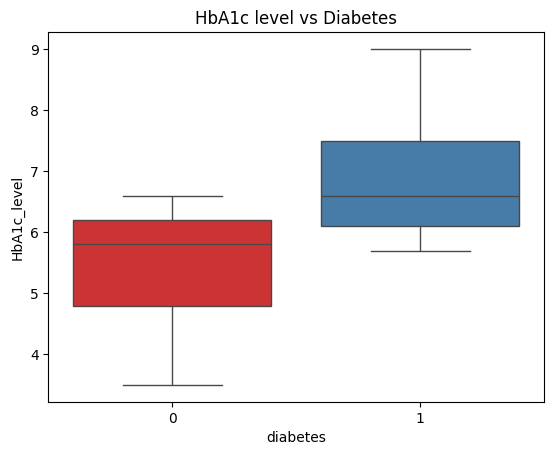

In [ ]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, palette='Set1')
plt.title('HbA1c level vs Diabetes')
plt.show()

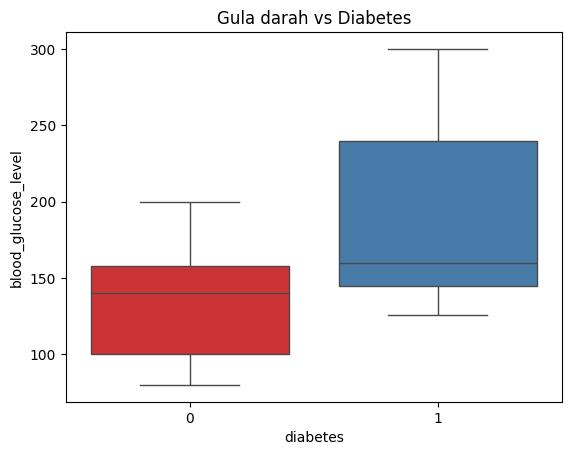

In [ ]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, palette='Set1')
plt.title('Gula darah vs Diabetes')
plt.show()

# PREPROCESSING


In [ ]:
def kategori_merokok(smoking_history):
    if smoking_history in ['never', 'No Info']:
        return 'tidak merokok'
    elif smoking_history == 'current':
        return 'merokok'
    elif smoking_history in ['ever', 'former', 'not current']:
        return 'dulu merokok'

df['smoking_history'] = df['smoking_history'].apply(kategori_merokok)
print(df['smoking_history'].value_counts())

smoking_history
tidak merokok    67276
dulu merokok     19655
merokok           9197
Name: count, dtype: int64


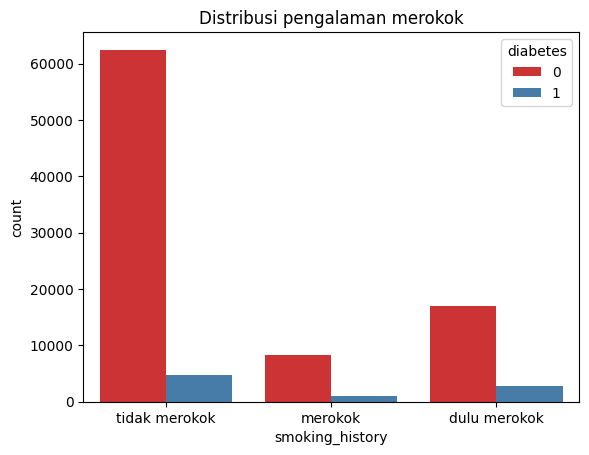

In [ ]:
sns.countplot(x='smoking_history', data=df, palette='Set1', hue='diabetes')
plt.title('Distribusi pengalaman merokok')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


Membuat salinan df disimpan dalam variabel data

In [ ]:
data = df.copy()

pd.get_dummies: Mengubah kolom kategori menjadi beberapa kolom biner.

df.drop: Menghapus kolom asli yang berisi kategori.

pd.concat: Menggabungkan kolom biner yang baru dibuat kembali ke DataFrame asli.

prefix: Menentukan awalan yang akan ditambahkan ke setiap kolom baru yang dihasilkan oleh one-hot encoding.

In [ ]:
def perform_one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df
data = perform_one_hot_encoding(data, 'gender')
data = perform_one_hot_encoding(data, 'smoking_history')

plt.figure(figsize=(15, 10))

correlasi: Data matriks korelasi yang akan divisualisasikan.

annot=True: Menampilkan nilai korelasi di dalam setiap sel heatmap.

cmap='coolwarm': Mengatur skema warna heatmap (dari cool (biru) ke warm (merah)).

linewidths=0.5: Mengatur lebar garis pemisah antar sel.

fmt='.2f': Mengatur format angka untuk nilai korelasi menjadi dua angka desimal.

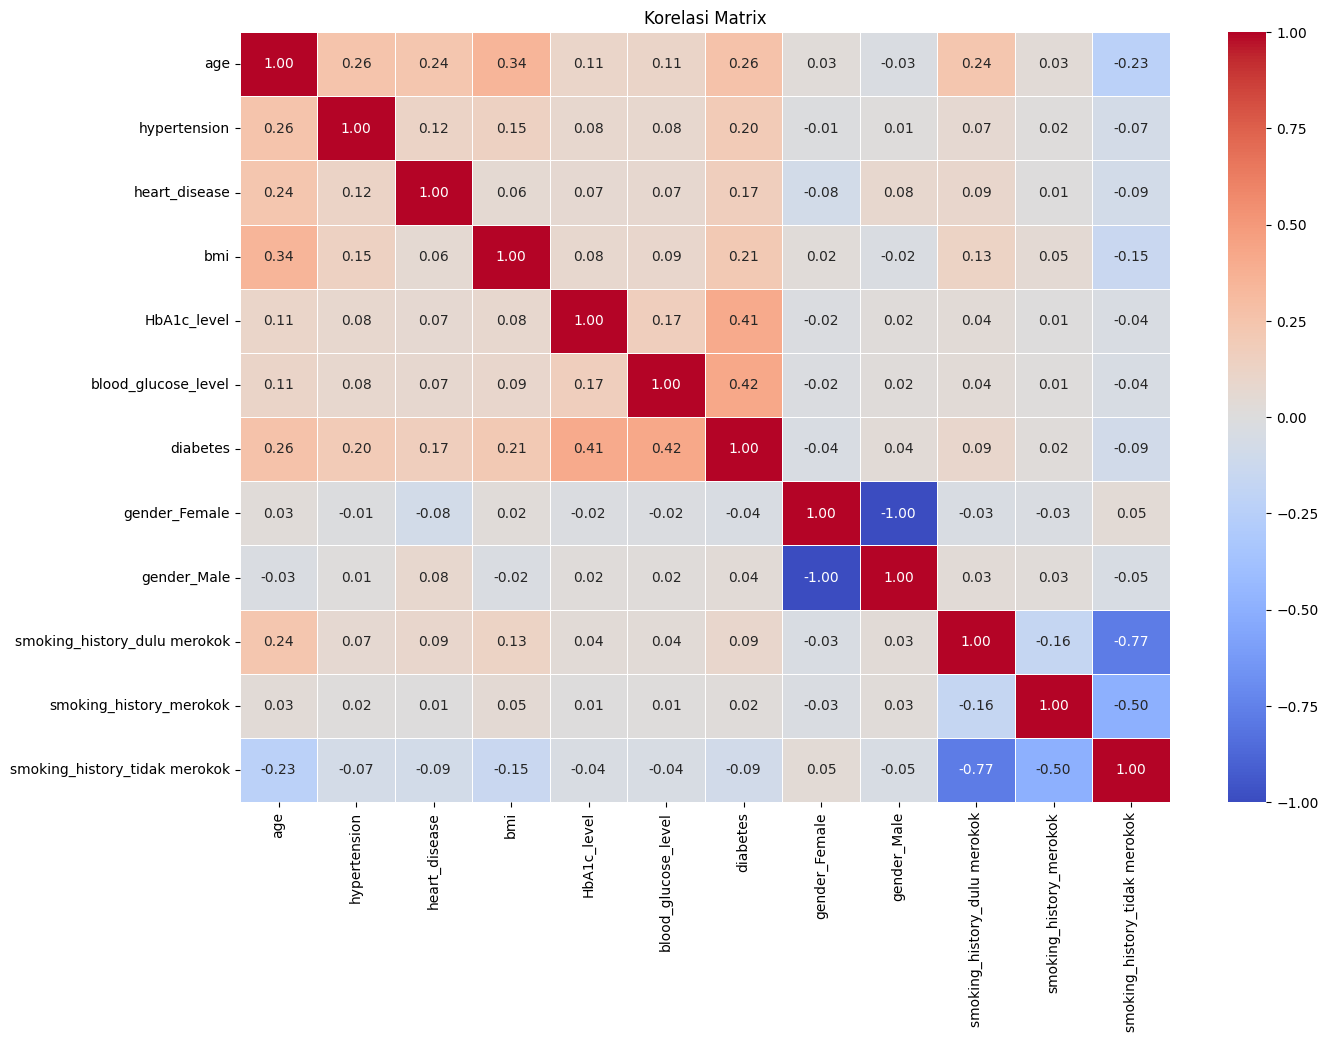

In [ ]:
correlasi = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlasi, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Korelasi Matrix")
plt.show()

SMOTE(sampling_strategy=0.1)
sampling_strategy=0.1 berarti bahwa setelah over-sampling, jumlah sampel dari kelas minoritas akan menjadi 10% dari jumlah sampel kelas mayoritas. Sebagai contoh, jika kelas mayoritas memiliki 1000 sampel, setelah SMOTE, kelas minoritas akan memiliki 100 sampel.

RandomUnderSampler(sampling_strategy=0.5)sampling_strategy=0.5 berarti bahwa setelah under-sampling, jumlah sampel dari kelas mayoritas akan menjadi 50% dari jumlah sampel kelas minoritas. Sebagai contoh, jika kelas minoritas memiliki 200 sampel, maka kelas mayoritas akan dikurangi menjadi 100 sampel.

In [ ]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

ColumnTransformer memungkinkan Anda untuk menerapkan transformasi yang berbeda pada kolom yang berbeda dalam DataFrame.

'numerik': Nama untuk transformasi ini.
StandardScaler(): Alat untuk menstandarisasi fitur numerik sehingga memiliki rata-rata 0 dan standar deviasi 1.

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']: Daftar kolom numerik yang akan distandarisasi.

'kategorik': Nama untuk transformasi ini.

OneHotEncoder(): Alat untuk mengubah kolom kategori menjadi beberapa kolom biner. Setiap kategori unik diubah menjadi kolom biner yang berbeda.

['gender','smoking_history']: Daftar kolom kategori yang akan diubah menjadi kolom biner.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerik', MinMaxScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
        ('kategorik', OneHotEncoder(), ['gender', 'smoking_history'])
    ])

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
X_transformed = preprocessor.fit_transform(X)
onehot_columns = preprocessor.named_transformers_['kategorik'].get_feature_names_out(['gender', 'smoking_history'])
all_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + list(onehot_columns)
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)
print(X_transformed_df.describe())

                age           bmi   HbA1c_level  blood_glucose_level  \
count  96128.000000  96128.000000  96128.000000         96128.000000   
mean       0.521980      0.202048      0.369570             0.264627   
std        0.281073      0.078989      0.195132             0.185960   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.299299      0.156279      0.236364             0.090909   
50%        0.537037      0.202031      0.418182             0.272727   
75%        0.737237      0.231676      0.490909             0.359091   
max        1.000000      1.000000      1.000000             1.000000   

       hypertension  heart_disease  gender_Female   gender_Male  \
count  96128.000000   96128.000000   96128.000000  96128.000000   
mean       0.077615       0.040810       0.584231      0.415769   
std        0.267567       0.197851       0.492857      0.492857   
min        0.000000       0.000000       0.000000      0.000000   
25%        0.000

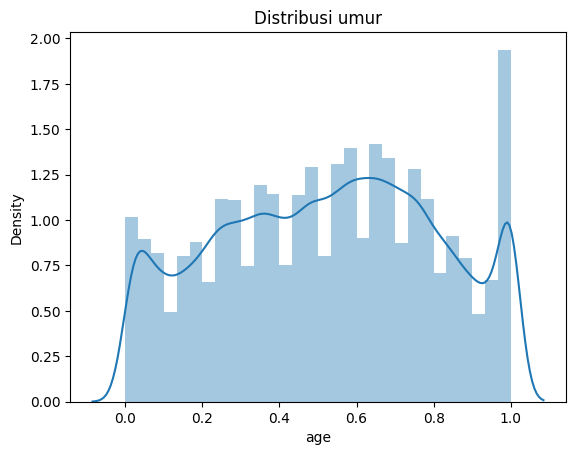

In [ ]:
sns.distplot(X_transformed_df['age'], bins=30)
plt.title('Distribusi umur')
plt.show()

In [ ]:
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

# MODEL

classifier__n_estimators: Mengatur jumlah pohon dalam hutan acak.

classifier__max_depth: Mengatur kedalaman maksimum pohon keputusan.

classifier__min_samples_split: Mengatur jumlah minimum sampel yang dibutuhkan untuk membagi node internal.

classifier__min_samples_leaf: Mengatur jumlah minimum sampel yang diperlukan untuk berada di node daun.

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100,150, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

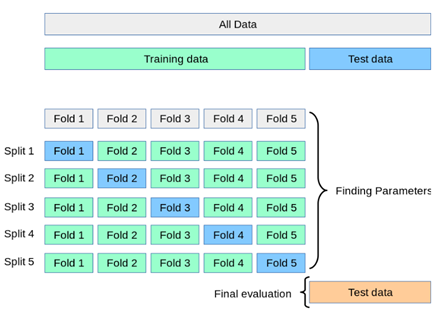

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}


In [ ]:
print(len(X_train))
print(len(X_test))

76902
19226


In [ ]:
onehot_columns = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['kategorik'].get_feature_names_out(['gender', 'smoking_history'])
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
feature_names = numeric_columns + list(onehot_columns)

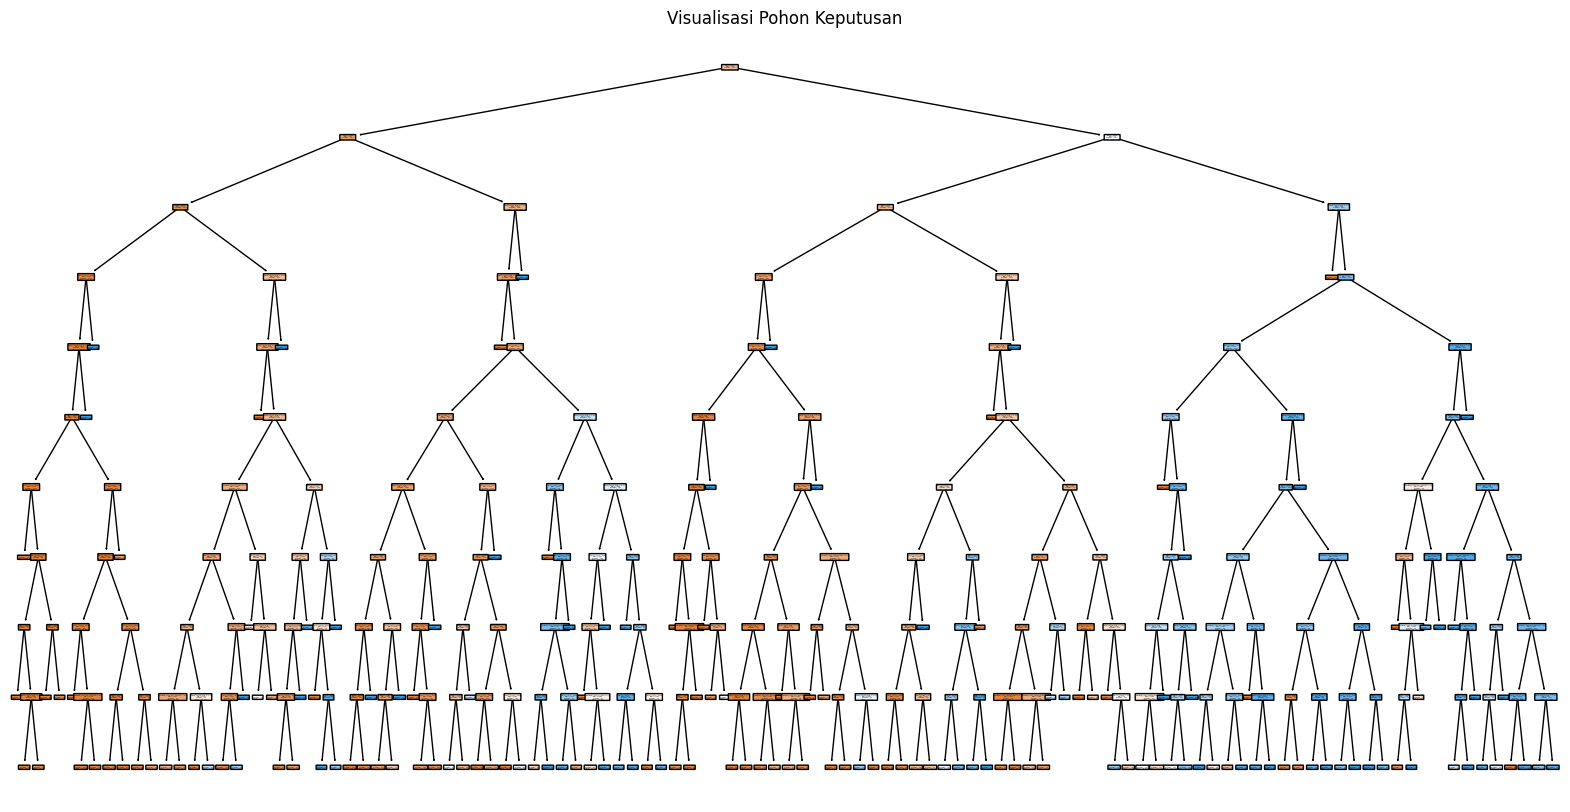

In [ ]:
from sklearn.tree import plot_tree

# Ambil salah satu pohon dari model Random Forest
estimator = grid_search.best_estimator_.named_steps['classifier'].estimators_[0]

# Plot pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=feature_names, filled=True, rounded=True)
plt.title('Visualisasi Pohon Keputusan')
plt.show()

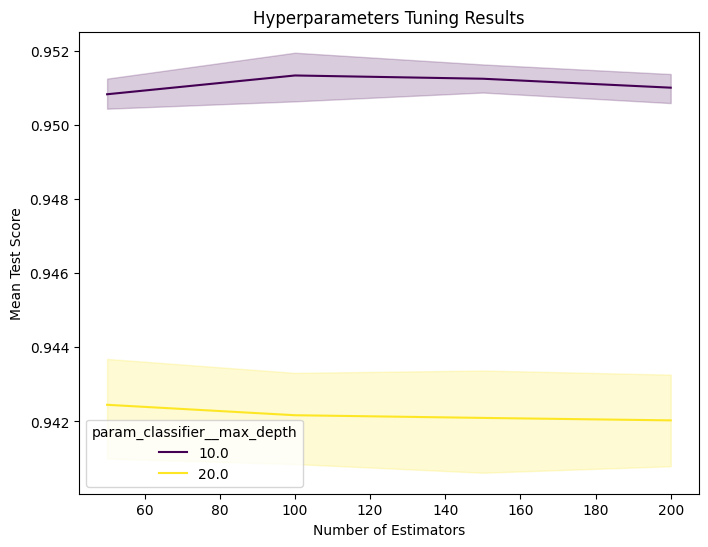

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

# PREDICT


Model Accuracy:  0.9503276812649537
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17525
           1       0.69      0.79      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.84      0.88      0.86     19226
weighted avg       0.95      0.95      0.95     19226



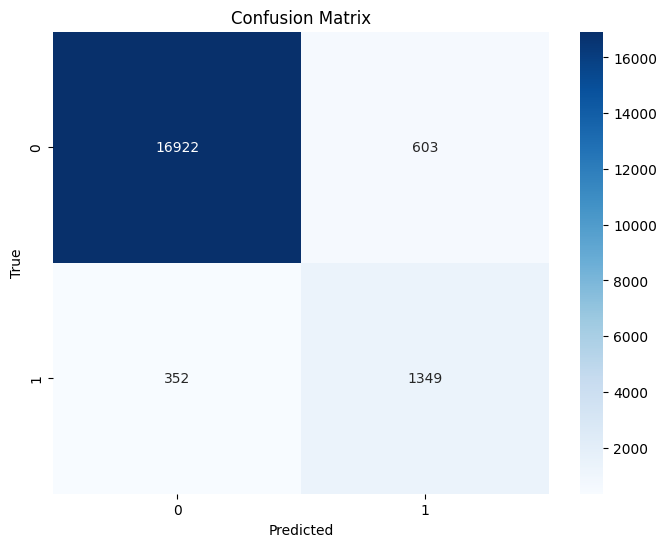

In [ ]:
y_pred = grid_search.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                          Feature  Importance
2                     HbA1c_level    0.441705
3             blood_glucose_level    0.321924
0                             age    0.118410
1                             BMI    0.057604
4                    hypertension    0.034706
5                   heart_disease    0.015435
8    smoking_history_dulu merokok    0.003230
10  smoking_history_tidak merokok    0.002982
6                   gender_Female    0.001870
7                     gender_Male    0.001562
9         smoking_history_merokok    0.000570


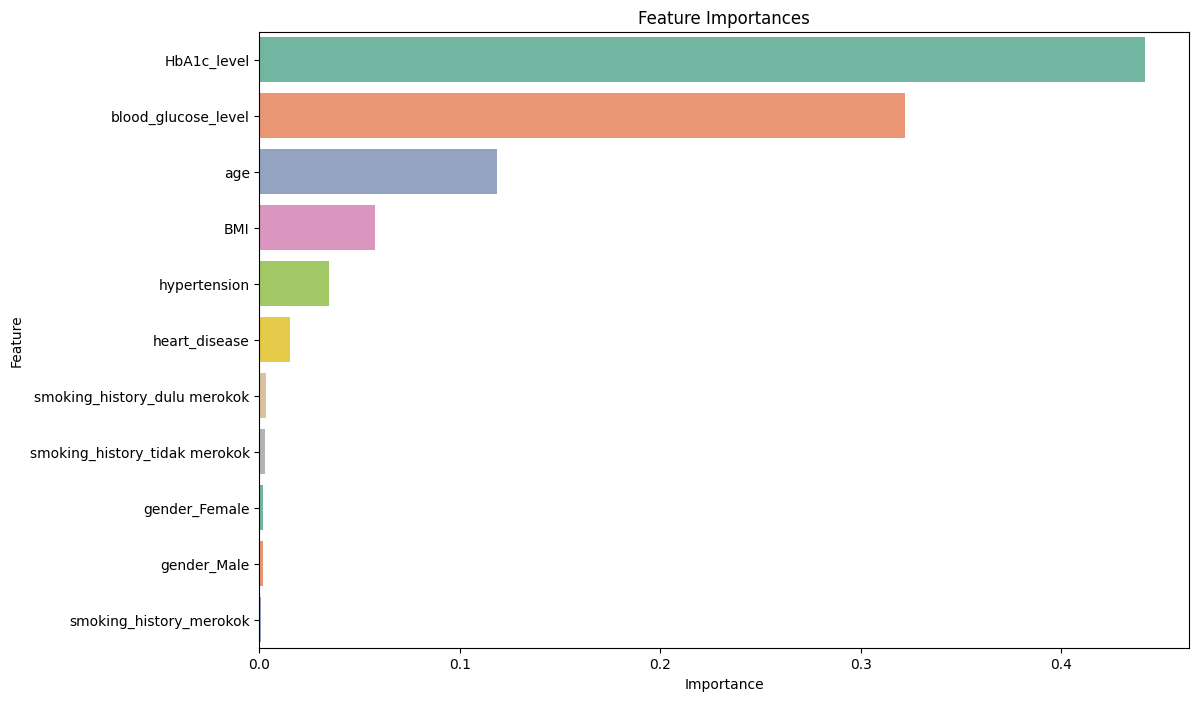

In [ ]:
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['kategorik'].get_feature_names_out(['gender', 'smoking_history']))
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Set2')
plt.title('Feature Importances')
plt.show()

# SUMMARY

Dari analisis yang telah dilakukan menggunakan dataset prediksi diabetes, dapat disimpulkan bahwa fitur-fitur seperti tingkat HbA1c, tingkat glukosa darah, usia, dan BMI adalah indikator utama dalam menentukan risiko diabetes. Tingkat HbA1c dan tingkat glukosa darah terbukti memiliki pengaruh terbesar, menunjukkan bahwa kadar gula darah yang tinggi sangat terkait dengan risiko diabetes. Usia juga merupakan faktor penting di mana risiko diabetes meningkat seiring bertambahnya usia, sedangkan BMI tinggi menunjukkan adanya risiko signifikan untuk diabetes. Fitur-fitur lain seperti hipertensi dan penyakit jantung memiliki pengaruh yang lebih rendah namun tetap signifikan. Jenis kelamin dan riwayat merokok memiliki pengaruh yang sangat kecil terhadap prediksi risiko diabetes.
